In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
#  set max_iter and tol explicitly to 
# avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])


<ipython-input-2-cc0cd0be6e0f>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


In [3]:
y_pred

array([1])

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
tf.__version__


'2.3.0'

In [6]:
keras.__version__

'2.4.0'

In [7]:
# load the datasets of fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
# 28 × 28 array rather than a 1D array of size 784
X_train_full.shape


(60000, 28, 28)

In [9]:
# it is int instead of float(in MNIST)
X_train_full.dtype

dtype('uint8')

In [10]:
# get the validation set
# scale because we are going to use gradient descent
# scale from (0,255) to (0,1),  by dividing by 255.
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
# instead of number 0 to 9, this is the class we are dealing with

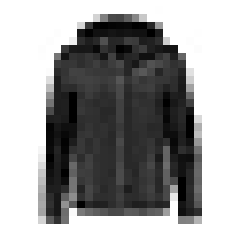

In [12]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()
# this is a coat

In [13]:
class_names[y_train[0]]


'Coat'

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
# instead of 1D of 784, 28*28
model.add(keras.layers.Dense(300, activation="relu")) # 300 neurons, dense hidden layer
model.add(keras.layers.Dense(100, activation="relu")) # 100 neurons, dense hidden layer
# 2 hidden layer
model.add(keras.layers.Dense(10, activation="softmax")) # dense output layer, 10 neurons, 1 per class
# the classes are exclusive
# multiclass

In [15]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [17]:
model.summary()
# s35500 = 784*300 + 300 bias

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.layers

In [19]:
 hidden1 = model.layers[1]

In [20]:
hidden1.name

'dense'

In [21]:
model.get_layer('dense') is hidden1

True

In [22]:
weights, biases = hidden1.get_weights()

In [23]:
 weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [24]:
weights.shape


(784, 300)

In [25]:
biases.shape

(300,)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [28]:
history = model.fit(X_train, y_train, epochs=30,
validation_data=(X_valid, y_valid))
# epochs' default is 1

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4844 - accuracy: 0.8316 - val_loss: 0.4349 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4393 - accuracy: 0.8455 - val_loss: 0.5306 - val_accuracy: 0.7992
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4125 - accuracy: 0.8564 - val_loss: 0.3916 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3940 - accuracy: 0.8620 - val_loss: 0.3752 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3754 - accuracy: 0.8675 - val_loss: 0.3708 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3633 - accuracy: 0.8715 - val_loss: 0.3629 - val_accuracy:

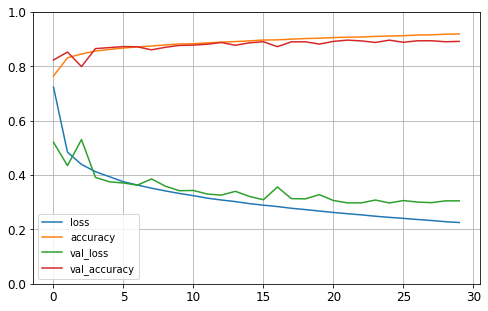

In [29]:
# seems not much overfitting
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# validation curves are close to the training
# curves, which means that there is not too much overfitting

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3393 - accuracy: 0.8822


[0.33928123116493225, 0.8822000026702881]

In [31]:
X_new = X_test[:3]

In [32]:
y_proba = model.predict(X_new)
    # sotfmax

In [33]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [34]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [35]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [36]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


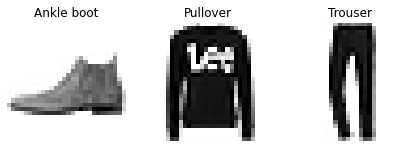

In [37]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

In [38]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [40]:
# classification
# model = keras.models.Sequential([
# keras.layers.Flatten(input_shape=[28, 28]),
# keras.layers.Dense(300, activation="relu"),
# keras.layers.Dense(100, activation="relu"),
# keras.layers.Dense(10, activation="softmax")
# ])

In [41]:
model = keras.models.Sequential([
keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7987 - val_loss: 0.6806
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5335 - val_loss: 0.5710
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6129 - val_loss: 0.4964
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4694 - val_loss: 0.4785
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4462 - val_loss: 0.4616
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4350 - val_loss: 0.4553
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4263 - val_loss: 0.4433
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4181 - val_loss: 0.4447
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4116 - val_loss: 0.4327
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4080 - val_loss: 0.4306

In [42]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 1ms/step - loss: 0.3843


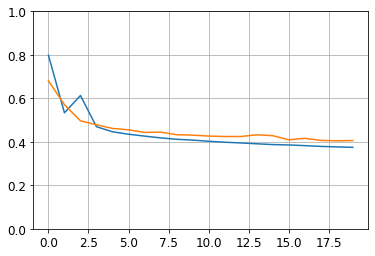

In [43]:
# use dataframe from history
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [44]:
# build with functional API
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
# we call it like a function, passing it the input.
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [45]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [46]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [47]:
# we cna compile as usual, but we need to pass a pair of metrics 
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:] # features 0-4, features 2-7
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [48]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8477 - val_loss: 0.9433
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8274 - val_loss: 0.7340
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6994 - val_loss: 0.6661
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6445 - val_loss: 0.6275
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6084 - val_loss: 0.5982
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5811 - val_loss: 0.5781
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5591 - val_loss: 0.5581
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5405 - val_loss: 0.5437
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5250 - val_loss: 0.5306
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5126 - val_loss: 0.5215

In [49]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))


162/162 [==============================] - 0s 2ms/step - loss: 0.4781


In [50]:
np.random.seed(42)
tf.random.set_seed(42)

In [51]:
# Adding an auxiliary output for regularization
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

In [52]:
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [53]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [54]:
#  the main output and the auxiliary output should try to predict the same thing
history = model.fit(
[X_train_A, X_train_B], [y_train, y_train], epochs=20,
validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))


Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.1377 - main_output_loss: 1.9300 - aux_output_loss: 4.0068 - val_loss: 1.0631 - val_main_output_loss: 0.8288 - val_aux_output_loss: 3.1725
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9125 - main_output_loss: 0.7249 - aux_output_loss: 2.6008 - val_loss: 0.8148 - val_main_output_loss: 0.6557 - val_aux_output_loss: 2.2465
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7656 - main_output_loss: 0.6357 - aux_output_loss: 1.9353 - val_loss: 0.7374 - val_main_output_loss: 0.6142 - val_aux_output_loss: 1.8463
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7043 - main_output_loss: 0.5994 - aux_output_loss: 1.6482 - val_loss: 0.6974 - val_main_output_loss: 0.5923 - val_aux_output_loss: 1.6432
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6687 - main_output_loss: 0.5769 - aux_output_loss: 1.4948 - val_loss

In [55]:
total_loss, main_loss, aux_loss = model.evaluate(
[X_test_A, X_test_B], [y_test, y_test])


162/162 [==============================] - 0s 1ms/step - loss: 0.5287 - main_output_loss: 0.4825 - aux_output_loss: 0.9444


In [56]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])


In [57]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [58]:
# saving and restoring
np.random.seed(42)
tf.random.set_seed(42)

In [59]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [60]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 1.8688 - val_loss: 0.7796
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7040 - val_loss: 0.6453
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6180 - val_loss: 0.6001
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5762 - val_loss: 0.5717
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5496 - val_loss: 0.5476
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5267 - val_loss: 0.5303
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5100 - val_loss: 0.5157
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4960 - val_loss: 0.5045
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4856 - val_loss: 0.4955
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4842


In [61]:
model.save("my_keras_model.h5")

In [62]:
model = keras.models.load_model("my_keras_model.h5")

In [63]:
# Using callback during training
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [64]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [65]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [66]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 1.8688
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7040
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6180
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5762
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5496
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5267
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5100
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4960
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4856
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4771


In [67]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid),
callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4696 - val_loss: 0.4839
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4642 - val_loss: 0.4775
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4595 - val_loss: 0.4728
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4550 - val_loss: 0.4719
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4533 - val_loss: 0.4663
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4484 - val_loss: 0.4643
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4457 - val_loss: 0.4614
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4428 - val_loss: 0.4594
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4407 - val_loss: 0.4571
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4388 - val_loss: 0.4549

In [68]:
model = keras.models.load_model("my_keras_model.h5")

In [69]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
restore_best_weights=True)
# if no progress on validation sets for 10 epoch

history = model.fit(X_train, y_train, epochs=100,
validation_data=(X_valid, y_valid),
callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4362 - val_loss: 0.4546
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4345 - val_loss: 0.4509
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4328 - val_loss: 0.4484
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4306 - val_loss: 0.4503
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4312 - val_loss: 0.4455
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4276 - val_loss: 0.4454
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4257 - val_loss: 0.4432
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4238 - val_loss: 0.4424
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4226 - val_loss: 0.4411
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4214 - val_lo

In [70]:
# write a custom callback
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [71]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

344/363 [===========================>..] - ETA: 0s - loss: 0.3492
val/train: 1.08
363/363 [==============================] - 1s 2ms/step - loss: 0.3486 - val_loss: 0.3750


In [72]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

# based on the time, so it is different everytime you run it

In [73]:
keras.backend.clear_session()
# clear before
np.random.seed(42)
tf.random.set_seed(42)

In [74]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [75]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
  1/363 [..............................] - ETA: 0s - loss: 8.4863WARNING:tensorflow:From C:\Users\haoyu\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 1s 2ms/step - loss: 1.8688 - val_loss: 0.7796
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7040 - val_loss: 0.6453
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6180 - val_loss: 0.6001
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5762 - val_loss: 0.5717
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5496 - val_loss: 0.5476
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5267 - val_loss: 0.5303
Epoch 7/30
363/363 [==============================] -

In [76]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 16188.

In [77]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2021_06_11-14_39_07'

In [78]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [79]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))
# learning rate is 0.05 this time

In [80]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 0.7432 - val_loss: 2.0988
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/30
363/363 [==============================] 

In [81]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

In [82]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [84]:
# finetune the hyperparameters
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape)) # input
    for layer in range(n_hidden):

        model.add(keras.layers.Dense(n_neurons, activation="relu")) # one hidden layer
    model.add(keras.layers.Dense(1))  # output layer
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model
# provide reasonable defaults to as many hyperparameters as you can


In [85]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [86]:
keras_reg.fit(X_train, y_train, epochs=100,
validation_data=(X_valid, y_valid),
callbacks=[keras.callbacks.EarlyStopping(patience=10)])
# we can train this like a regular Scikit-Learn regressor

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.0566 - val_loss: 0.7676
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6914 - val_loss: 0.6127
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5818 - val_loss: 0.5436
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5167 - val_loss: 0.5164
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4896 - val_loss: 0.4981
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4758 - val_loss: 0.4882
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4662 - val_loss: 0.4783
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4583 - val_loss: 0.4724
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4525 - val_loss: 0.4673
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4481 - val_lo

In [87]:
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)


162/162 [==============================] - 0s 840us/step - loss: 0.3601


In [88]:
np.random.seed(42)
tf.random.set_seed(42)

In [89]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8870 - val_loss: 0.6316
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5275 - val_loss: 0.5129
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4801 - val_loss: 0.4878
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4664 - val_loss: 0.4760
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4608 - val_loss: 0.4828
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4569 - val_loss: 0.4700
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4499 - val_loss: 0.4696
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4448 - val_loss: 0.4772
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4397 - val_loss: 0.4657
Epoch 10/100
242/242 [========

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000022F7F65B8E0>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302...
                                                          0.005021425736625637,
                                                  

In [90]:
rnd_search_cv.best_params_

{'n_neurons': 74, 'n_hidden': 3, 'learning_rate': 0.005803602934201024}

In [91]:
rnd_search_cv.best_score_

-0.30289607246716815

In [92]:
rnd_search_cv.best_estimator_

In [93]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 927us/step - loss: 0.3127


-0.3126693069934845

In [94]:
model = rnd_search_cv.best_estimator_.model
model

In [95]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 867us/step - loss: 0.3127


0.3126693069934845